In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def coin_payoff(n):
    outcome = np.random.binomial(n, 0.5)
    if outcome == 1:
        payoff = 0.5
    elif outcome == 0:
        payoff = 2
    return payoff

In [3]:
def payoff(cash_ret_list):
    
    payoff = pd.DataFrame(cash_ret_list).pct_change()
    payoff = payoff.fillna(0)
    payoff = (payoff+1).cumprod()
    payoff = payoff -1 
    
    return payoff
    

In [4]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

In [5]:
def volatility(list_asset):
    ret = pd.DataFrame(list_asset)
    ret = ret/ret.shift(1)
    ret = ret.fillna(1)
    log_ret = np.log(ret)
    volatility = log_ret.std() 
    return(volatility)

# Shannons Deamon Illustration with a coin and cash

This script illustrates Shannons Deamon with a coin flip which will either dubble or half ones monetary base with equal probability. 

TODO
- geo and arithemtic mean
- correlation

In [12]:
runs = 1000
outcome =pd.DataFrame(np.random.binomial(1, 0.5, size = runs))

In [13]:
outcome[outcome==1]=2
outcome[outcome==0] = 0.5
outcome.iloc[0] = 1

In [14]:
init_coin_cash = 1
cash_weight = 0.5
coin_weight = 1 - cash_weight
coin_cash_return = []
for i in range(runs):
    coin_cash_return.append(init_coin_cash)
    cash = float(init_coin_cash * cash_weight)
    coin = float(init_coin_cash * coin_weight)
    coin = float(coin * outcome.loc[i])
    init_coin_cash = coin + cash
    
cash = [1] * runs

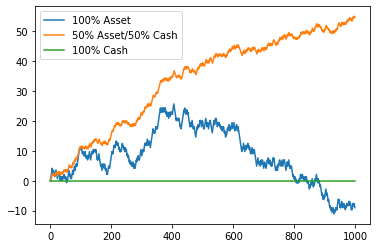

In [15]:
plt.plot(np.log(outcome.cumprod()), label = "100% Asset")
plt.plot(np.log(coin_cash_return), label = str(round(coin_weight*100))+"% Asset/"+ str(round(cash_weight*100))+"% Cash")
plt.plot(np.log(cash), label = "100% Cash")
plt.legend();

As one can see Shannons Deamon is real. By having rebalancing to 50% cash after each coin flip, (this allocation is by no means optimized), one is able to generate a positive return from an asset with no return at all. 

# Two different coins

In [16]:
outcome_2 = pd.DataFrame(np.random.binomial(1, 0.5, size = runs))
outcome_2[outcome_2==1]=2
outcome_2[outcome_2==0] = 0.5
outcome_2.iloc[0] = 1

coins_return = []
init_coins_cash = 1

coin1_weight = 0.5
coin2_weight = 1 - coin1_weight

for i in range(runs):
    coins_return.append(init_coins_cash)
    
    coin1 = float(init_coins_cash * coin1_weight)
    coin2 = float(init_coins_cash * coin2_weight)
    
    coin1 = float(coin1 * outcome.loc[i])
    coin2 = float(coin2 * outcome_2.loc[i])
    init_coins_cash = coin1 + coin2
    

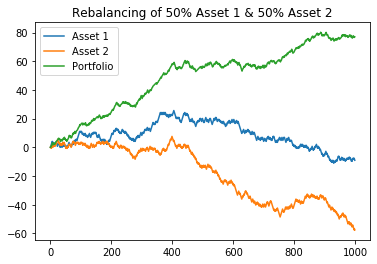

In [17]:
plt.plot(np.log(outcome.cumprod()), label = "Asset 1")
plt.plot(np.log(outcome_2.cumprod()), label = "Asset 2")
plt.plot(np.log(coins_return), label = "Portfolio")
plt.legend();
plt.title("Rebalancing of " + str(round(coin1_weight*100))+"% Asset 1 & "+ str(round(coin2_weight*100))+"% Asset 2");

By having two coins with the same payoff, where the long term return is 0%, one is able to generate a substantial profit. 

The clear issue with these examples is that we know that the assets are uncorrelated and the long term return, these things are never known ex ante in the real world. 